## 01 Functions
- make code reusable
- inheritance: classes and functions

In [2]:
def mean(values):
    return sum(values) / len(values)

mean([1,2,3])

2.0

In [3]:
#functions with two arguments
def concat_strings(string_1, string_2):
    return string_1 + string_2

# A function with no arguments
def smile():
    return "😊"

print(concat_strings("Hello ", "World"))
print(smile())

Hello World
😊


In [6]:
def print_greeting(name):
    print(f"Hello {name}!")

print_greeting("Simon")

Hello Simon!


#### Functions: Scopes
- you can create new variables within a function (they are only used there, no external access!)

In [8]:
def concat_strings(string_1, string_2):
    concatenated_string = string_1 + string_2
    return concatenated_string

print(concat_strings("Hello ", "World"))

Hello World


#### Functions as objects
- len() and sorted()

In [9]:
authors = ["Goethe", "Kracht", "Fontane", "Schiller", "Hahn"]

print(sorted(authors))

print(len("Goethe"))
print(sorted(authors, key=len)) #sortiert nach key=länge

['Fontane', 'Goethe', 'Hahn', 'Kracht', 'Schiller']
6
['Hahn', 'Goethe', 'Kracht', 'Fontane', 'Schiller']


#### Functions: Default arguments
- arguments (start=value) can be changed (in this case: the value) 

In [10]:
def product(values, start=1):
    product = start
    for value in values:
        product = product * value
    return product

print(product([1, 2, 3]))
print(product([1, 2, 3], start=2))

6
12


#### List expressions
- operations on an existing list

In [11]:
len_names = []
for name in authors:
    len_names.append(len(name))
print(len_names)

[6, 6, 7, 8, 4]


In [12]:
len_names = [len(name) for name in authors]
print(len_names)

[6, 6, 7, 8, 4]


In [11]:
op1 = " ".join([token.capitalize() for token in "my thesis title".split()]) #join() empty separator oder bestimmtes zeichen joinen lassen
print(op1)

My Thesis Title


#### List expressions: Filtering -> if/else

In [15]:
even_numbers = [number for number in range(1, 26) if number % 2 == 0]
print(even_numbers)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]


In [19]:
even_numbers_str = [
    f"{number} is even" if number % 2 == 0 else f"{number} is odd" #rückgabe
    for number in range(1, 26) #schleife nach rückgabe
]
print(even_numbers_str)

['1 is odd', '2 is even', '3 is odd', '4 is even', '5 is odd', '6 is even', '7 is odd', '8 is even', '9 is odd', '10 is even', '11 is odd', '12 is even', '13 is odd', '14 is even', '15 is odd', '16 is even', '17 is odd', '18 is even', '19 is odd', '20 is even', '21 is odd', '22 is even', '23 is odd', '24 is even', '25 is odd']


## 02 Object Oriented Programming (OOP)
- OOP to store data that operates on the data
- structured data
- customize things more easily
- makes code easier to read and understand

In [20]:
text = "OOP can be helpful" # <- Data: Sequence of characters
text.upper() # <- `Function` (actually it is called method)
             # that operates on the data of the string in variable `text`

'OOP CAN BE HELPFUL'

In [21]:
#bundled data
my_dataset = {
    "excavation_ids": ["south_1", "south_2", "south_3", "north_1", "north_2", "east_1", "east_2"],
    "num_artifacts": [1, 3, 4, 10, 9, 2, 5]
}

#### Normal structure with functions

In [23]:
def mean_by_direction(excavation_ids, num_artifacts):
    directions = [excavation_id.split("_")[0] for excavation_id in excavation_ids]
    results = {}
    for uniq_direction in set(directions):
        aggregated_num_findings = [
            n_artifacts
            for excavation_id, n_artifacts in zip(excavation_ids, num_artifacts) #zip: bei listen, um e1 aus l1 e1 aus l2 zuzuweisen etc.
            if excavation_id.startswith(uniq_direction)
        ]
        results[uniq_direction] = mean(aggregated_num_findings)
    return results

In [24]:
mean_by_direction(my_dataset["excavation_ids"], my_dataset["num_artifacts"])

{'south': 2.6666666666666665, 'east': 3.5, 'north': 9.5}

#### Better structure with classes

In [18]:
#perfect (reusable) data set

class ExcavationDataset:
    
    # Constructor of the class, defines how a object is created
    # Its main purpose is to define the way data is stored within the object.
    def __init__(self, excavation_ids, num_artifacts):
        # The self-argument in each method represents the object itself.
        # It is used to access the attributes and methods of the object.
        # If you call a method, it's not necessary to care about the self argument,
        # Python will set it automatically
        # Each following argument is exposed to the outside and must be set when calling the method.
        
        # By assinging fields to self you can create attributes
        # (I.e., internal variables that store data within an object)
        
        self.excavation_ids = excavation_ids
        self.num_artifacts = num_artifacts
    
    # Besides special methods such as the __init__-constructor-method, you can also define custom methods.
    # The mean_by_direction method only operates on the internal data of the objects,
    # so it does not receive any external arguments. 
    def mean_by_direction(self):
        directions = [
            excavation_id.split("_")[0]
            # Using the self-argument you can access attributes and other methods of the object
            for excavation_id in self.excavation_ids 
        ]
        results = {}
        for uniq_direction in set(directions): #set() erstellte eine random order von objekten einer liste
            aggregated_num_findings = [
                n_artifacts
                for excavation_id, n_artifacts in zip(self.excavation_ids, self.num_artifacts)
                if excavation_id.startswith(uniq_direction)
            ]
            results[uniq_direction] = mean(aggregated_num_findings)
        return results

In [19]:
#objects that store our data from the class before


dataset = ExcavationDataset(
    excavation_ids=["south_1", "south_2", "south_3", "north_1", "north_2", "east_1", "east_2"],
    num_artifacts=[1, 3, 4, 10, 9, 2, 5]
)
type(dataset)

__main__.ExcavationDataset

In [20]:
dataset.excavation_ids

['south_1', 'south_2', 'south_3', 'north_1', 'north_2', 'east_1', 'east_2']

In [34]:
dataset.mean_by_direction()

{'south': 2.6666666666666665, 'east': 3.5, 'north': 9.5}

#### Terminology
- Class: Defintion of how to structure and create objects of the same kind (like a Blueprint)
- Instance/ object: Concrete manifestion of a class. They contain concrete data. Mutliple objects of the same class can be instantiated.
- Method: Functions that are bound to an object, and can access its data (via the self-argument).
- Attribute/ Field: Data of an object.
- Inheritance: Classes can inherit properties (e.g. methods and attributes) from other classes.
- Superclass and Subclass: If class B inherits properties from class A, class A is called superclass of B. Vice versa Class B is called subclass (or child-class) of A.

#### Regression model using OOP
- advantages: train your model, access its parameters, make predictions, save and load it later

In [35]:
class RegressionModel:
    def __init__(self, learning_rate=1.0, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def predict(self, x):
        y_pred = [self.weight_ * xi + self.bias_ for xi in x]
        return y_pred
        
    def fit(self, x, y):
        self.weight_, self.bias_ = sum(x) / len(x), 0.0
        for iteration in range(self.n_iterations):
            weight_gradient, bias_gradient = 0.0, 0.0
            for xi, yi in zip(x, y):
                weight_gradient += xi * (self.predict([xi])[0] - yi)
                bias_gradient += self.predict([xi])[0] - yi
            self.weight_ -= self.learning_rate * (weight_gradient / len(x)) 
            self.bias_ -= self.learning_rate * (bias_gradient / len(x))
        return self

Learned weight: -0.99751188719238 and bias: 2.998707444486552


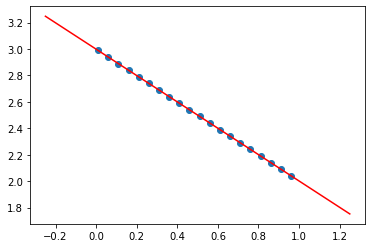

In [36]:
import matplotlib.pyplot as plt

x, y = [i/100 for i in range(1, 101, 5)], [3-((i/100)) for i in range(1, 101, 5)]

regressor = RegressionModel().fit(x, y)
print(f"Learned weight: {regressor.weight_} and bias: {regressor.bias_}")

x_pred = [i/100 for i in range(-25, 126, 5)]
y_pred = regressor.predict(x_pred)
plt.scatter(x, y)
plt.plot(x_pred, y_pred, color="red")
plt.show()

In [37]:
import pickle

# Save model to disk
with open("my_model.pickle", "wb") as out_f:
    pickle.dump(regressor, out_f)

# Delete the model from memory
del regressor

# Load it from disk
with open("my_model.pickle", "rb") as in_f:
    regressor = pickle.load(in_f)

print(f"Learned weight: {regressor.weight_} and bias: {regressor.bias_}")

Learned weight: -0.99751188719238 and bias: 2.998707444486552


#### OOP: Inheritance
- inheritance: enables classes and objects to inherit methods and attributes from other types (=classes)
- you can derive subclasses from another class

In [38]:
# Recall the ExcavationDataset

class ExcavationDataset:
    def __init__(self, excavation_ids, num_artifacts):
        self.excavation_ids = excavation_ids
        self.num_artifacts = num_artifacts
    
    def mean_by_direction(self):
        directions = [
            excavation_id.split("_")[0]
            for excavation_id in self.excavation_ids 
        ]
        results = {}
        for uniq_direction in set(directions):
            aggregated_num_findings = [
                n_artifacts
                for excavation_id, n_artifacts in zip(self.excavation_ids, self.num_artifacts)
                if excavation_id.startswith(uniq_direction)
            ]
            results[uniq_direction] = mean(aggregated_num_findings)
        return results

In [39]:
# We state the class we want to inherit in round brackets after the class name.
class DepthExcavationDataset(ExcavationDataset):
    def __init__(self, excavation_ids, num_artifacts, depth_of_artifacts):
        # We can leverage the constructor of our superclass
        # since it already defines how to handle the values of excavation_ids and num_artifacts.
        # Calling the super function within a method returns the superclass of the current class.
        super().__init__(excavation_ids=excavation_ids, num_artifacts=num_artifacts)

        # We only define how to handle the new arguments. 
        self.depth_of_artifacts = depth_of_artifacts
    
    # Now, we can add new methods to the subclass
    def count_artifacts_depth_range(self, min_depth, max_depth):
        return sum([
            n_artifacts 
            for n_artifacts, depth in zip(self.num_artifacts, self.depth_of_artifacts)
            if min_depth <= depth <= max_depth
        ])

In [41]:
dataset = DepthExcavationDataset(
    excavation_ids=["south_1", "south_2", "south_3", "north_1", "north_2", "east_1", "east_2"],
    num_artifacts=[1, 3, 4, 10, 9, 2, 5],
    depth_of_artifacts=[0.3, 0.2, 1.0, 0.1, 0.2, 0.5, 0.5]
)

In [42]:
#using new methods
dataset.count_artifacts_depth_range(0.1, 0.4)

23

In [45]:
#get values from our superclass
dataset.mean_by_direction()

{'south': 2.6666666666666665, 'east': 3.5, 'north': 9.5}

## 03 Documentation and type annotations
- helps us to reconsider how we solved a coding problem
- helps our colleagues to understand our code much better

#### Documenting a function
Docstrings concisely describe what your function does, how the input should look, and how the output is structured.
Type annotations describe what types your arguments can have, and the data type of the returned values of the function (after the -> arrow) All of that is parsed by the help function and assembled into a human-readable manual of your function.



In [8]:
from typing import List
from string import punctuation

def tokenize(text: str) -> List:
    """Tokenizes a text and strips all punctuation marks from single tokens.
    
    Args:
        text: The text to tokenize

    Returns:
        The list of tokens 
    """
    tokens = [token.strip(punctuation) for token in text.split() if token.strip()] #strip() entfernt whitespaces per default oder eine bestimmte bedingung (eingetragen in klammmern)
    return tokens

print(help(tokenize))

print(tokenize("""

My dear friend,
Documenting my code is a hardly bearable chore....
But I will pull myself together for the noble cause!!!
Yours truly,
A responsible programmer

"""))

Help on function tokenize in module __main__:

tokenize(text: str) -> List
    Tokenizes a text and strips all punctuation marks from single tokens.
    
    Args:
        text: The text to tokenize
    
    Returns:
        The list of tokens

None
['My', 'dear', 'friend', 'Documenting', 'my', 'code', 'is', 'a', 'hardly', 'bearable', 'chore', 'But', 'I', 'will', 'pull', 'myself', 'together', 'for', 'the', 'noble', 'cause', 'Yours', 'truly', 'A', 'responsible', 'programmer']


#### Documenting classes
- methods within a class can be documented like functions
- describe the whole class

In [47]:
from typing import List, Dict
class ExcavationDataset:
    """This class represents a dataset describing a set of excavation sites.
    Attributes:
        excavation_ids: ID of each individual excavation site of format "<direction>_<num>"
        num_artifacts: The number of found artifacts at each site.
    """
    def __init__(self, excavation_ids: List[str], num_artifacts: List[int]):
        """Constructor of the class.
        Attributes:
            excavation_ids: See class description
            num_artifacts: See class description
        """
        self.excavation_ids = excavation_ids
        self.num_artifacts = num_artifacts
    
    def mean_by_direction(self) -> Dict[str, float]:
        """Returns the mean number of found artifacts per direction.
        """
        directions = [
            excavation_id.split("_")[0]
            for excavation_id in self.excavation_ids 
        ]
        results = {}
        for uniq_direction in set(directions):
            aggregated_num_findings = [
                n_artifacts
                for excavation_id, n_artifacts in zip(self.excavation_ids, self.num_artifacts)
                if excavation_id.startswith(uniq_direction)
            ]
            results[uniq_direction] = mean(aggregated_num_findings)
        return results

In [48]:
help(ExcavationDataset)

Help on class ExcavationDataset in module __main__:

class ExcavationDataset(builtins.object)
 |  ExcavationDataset(excavation_ids: List[str], num_artifacts: List[int])
 |  
 |  This class represents a dataset describing a set of excavation sites.
 |  Attributes:
 |      excavation_ids: ID of each individual excavation site of format "<direction>_<num>"
 |      num_artifacts: The number of found artifacts at each site.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, excavation_ids: List[str], num_artifacts: List[int])
 |      Constructor of the class.
 |      Attributes:
 |          excavation_ids: See class description
 |          num_artifacts: See class description
 |  
 |  mean_by_direction(self) -> Dict[str, float]
 |      Returns the mean number of found artifacts per direction.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  